# Modelos TFG 

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [472]:
df_modelos = pd.read_csv("../data/datosFinales/df_modelos.csv", sep = ";")
# drop columns from df_modelos which end with _1
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.contains('diferencia', case=False)]
categoricas = pd.read_csv("../data/categoricas.csv", sep = ",").squeeze().tolist()
print(len(categoricas))
#pop from categoricas 'tipo_plastia' and 'via_asc_plastia'
categoricas.remove('tipo_plastia')
categoricas.remove('via_asc_plastia')
print(len(categoricas))

30
28


In [473]:
df_modelos.shape

(728, 141)

In [474]:
#fija el random state de todo el documento para todas las ejecuciones
np.random.seed(14)

In [475]:
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_5')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_4')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_3')]

df_modelos

,id_registro,sexo,edad,peso,talla,imc,neoadyuvancia,localizacion,tipo_histologico,ct,...,temp_corp_2,pcr_2,plaquetas_2,leucocitos_2,tad_2,tas_2,creatinina_2,frec_resp_2,eva_2,frec_card_2
0,92-1,0.0,61.0,79.0,178.0,24.9,1.0,4.0,1.0,4.0,...,36.6,207.00,11.877576,9.043223,85.0,150.0,0.72,24.0,6.0,92.0
1,92-2,1.0,79.0,95.0,170.0,32.9,0.0,4.0,1.0,2.0,...,36.4,141.70,11.751950,8.955577,55.0,115.0,1.24,23.0,3.0,73.0
2,92-3,0.0,74.0,94.0,175.0,30.7,1.0,4.0,NaN,4.0,...,35.5,126.40,11.736077,9.068892,65.0,106.0,0.71,22.0,2.0,60.0
3,92-4,0.0,74.0,63.0,168.0,22.3,2.0,3.0,1.0,5.0,...,36.0,155.40,11.884496,9.457279,60.0,100.0,0.43,22.0,3.0,100.0
4,92-5,0.0,62.0,57.0,157.0,23.1,2.0,4.0,1.0,4.0,...,35.8,414.90,12.546114,8.304247,65.0,126.0,0.62,18.0,4.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,613-30,0.0,72.0,83.0,169.0,29.1,1.0,3.0,1.0,3.0,...,37.8,7.89,12.089544,9.923339,89.0,134.0,1.04,29.0,4.0,103.0
724,613-31,1.0,40.0,58.0,160.0,22.7,0.0,5.0,1.0,3.0,...,37.2,9.06,12.043560,8.801018,76.0,123.0,0.52,24.0,5.0,88.0
725,613-32,0.0,59.0,82.0,171.0,28.0,1.0,7.0,1.0,2.0,...,37.0,7.89,12.323860,8.969669,69.0,139.0,0.57,26.0,2.0,78.0
726,617-1,0.0,74.0,53.0,160.0,20.7,0.0,6.0,2.0,2.0,...,37.1,272.00,11.635152,8.684570,87.0,134.0,0.42,15.0,5.0,89.0


## HGBC

In [476]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           accuracy_score,
                           roc_auc_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder





In [477]:
df_tmp = df_modelos.copy().drop('id_registro', axis=1, errors='ignore')
df_tmp = df_tmp.copy()[df_modelos['fuga'] != -1]

y = df_tmp['fuga']
X = df_tmp.drop(columns='fuga')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [478]:
# modelo_hgb = HistGradientBoostingClassifier(
#     max_iter=1000,           # Número de árboles (iteraciones)
#     learning_rate=0.2,      # Tasa de aprendizaje
#     max_depth=6,            # Profundidad máxima de los árboles
#     categorical_features=categoricas,  # Especificar columnas categóricas
#     early_stopping=True,    # Parada temprana si no mejora
#     scoring='roc_auc'      # Métrica para early stopping
# )

#gridsearch l2regularization, learning_rate, class_weight (balance) 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut


param_grid = {
    'max_iter': [5,10,30,50,100],
    'learning_rate': [0.5, 0.8, 0.9, 1],
    'max_depth': [1, 2,3],
    'min_samples_leaf': [1, 2, 3, 4],
    'early_stopping': [True],
    'l2_regularization': [0.6, 0.7, 0.8, 1, 1.2],
    'class_weight': ['balanced', None]
}
modelo_hgb = HistGradientBoostingClassifier(random_state=14)
# Use RandomizedSearchCV for a more efficient search
grid_search = RandomizedSearchCV(modelo_hgb, param_grid, cv=LeaveOneOut(), n_jobs=-1)
grid_search.fit(X_train, y_train)


RandomizedSearchCV(cv=LeaveOneOut(),
                   estimator=HistGradientBoostingClassifier(random_state=14),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'early_stopping': [True],
                                        'l2_regularization': [0.6, 0.7, 0.8, 1,
                                                              1.2],
                                        'learning_rate': [0.5, 0.8, 0.9, 1],
                                        'max_depth': [1, 2, 3],
                                        'max_iter': [5, 10, 30, 50, 100],
                                        'min_samples_leaf': [1, 2, 3, 4]})

In [479]:
print("Mejores hiperparámetros:")
print("max_iter: 1000")
print("learning_rate: ", grid_search.best_params_['learning_rate'])
print("max_depth: ", grid_search.best_params_['max_depth'])
print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("early_stopping: ", grid_search.best_params_['early_stopping'])
print("l2_regularization: ", grid_search.best_params_['l2_regularization'])
print("class_weight: ", grid_search.best_params_['class_weight'])
print("Mejor puntuación:")
print(grid_search.best_score_)


Mejores hiperparámetros:
max_iter: 1000
learning_rate:  0.5
max_depth:  1
min_samples_leaf:  3
early_stopping:  True
l2_regularization:  0.8
class_weight:  None
Mejor puntuación:
0.79957805907173


In [480]:
#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)

modelo_hgb.fit(X_train, y_train)

y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1] 

y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1] 


In [481]:

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))



print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Matriz de confusión con train
[[302  80]
 [ 13  79]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       382
           1       0.50      0.86      0.63        92

    accuracy                           0.80       474
   macro avg       0.73      0.82      0.75       474
weighted avg       0.87      0.80      0.82       474

Accuracy: 0.8037974683544303
AUC: 0.8885442749829273


Matriz de confusión con test
[[107  58]
 [ 18  21]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       165
           1       0.27      0.54      0.36        39

    accuracy                           0.63       204
   macro avg       0.56      0.59      0.55       204
weighted avg       0.74      0.63      0.66       204

Accuracy: 0.6274509803921569
AUC: 0.6374514374514375


In [482]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)


F1 score: 0.6294820717131474
F1 score: 0.3559322033898305


In [483]:
#numero iteraciones modelo hgbc
modelo_hgb.n_iter_no_change

10

In [484]:
modelo_hgb

HistGradientBoostingClassifier(class_weight='balanced', early_stopping=True,
                               l2_regularization=0.8, learning_rate=0.5,
                               max_depth=1, min_samples_leaf=3, random_state=14,
                               scoring='roc_auc')

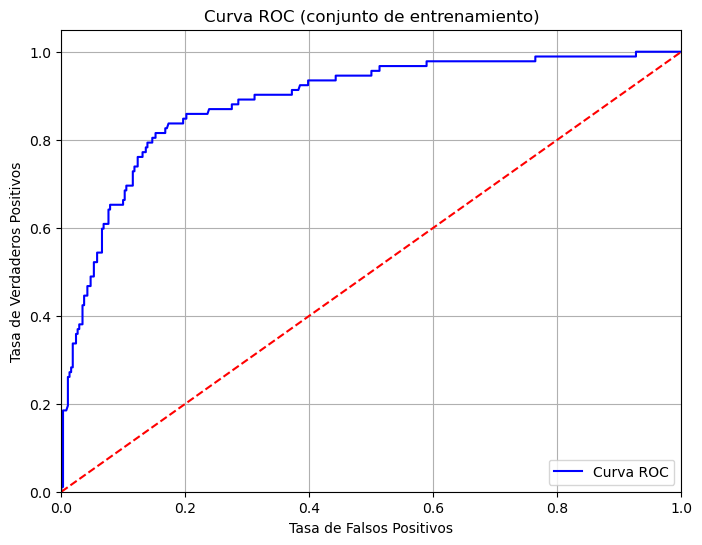

In [485]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()



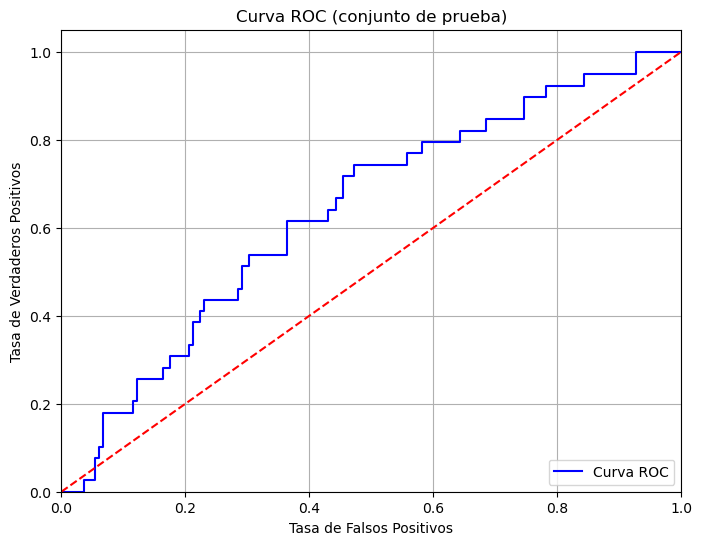

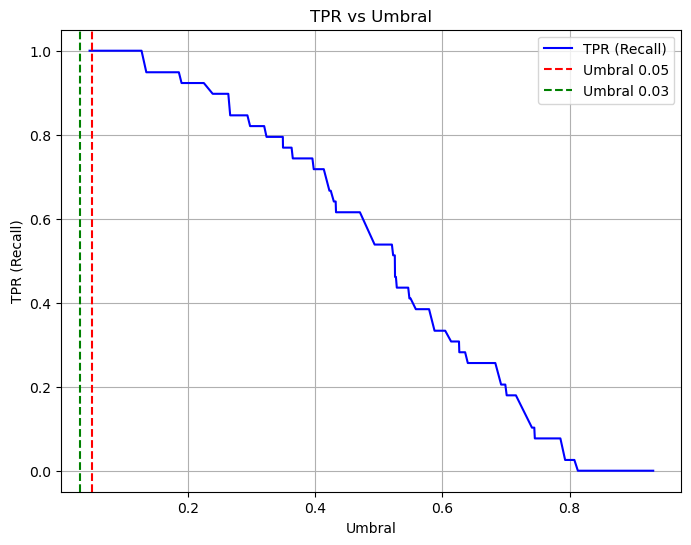

In [486]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [487]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, X, y)
vi = exp.model_parts()
vi.plot(max_vars=25)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-31:-1].tolist()

Preparation of a new explainer is initiated

  -> data              : 678 rows 88 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x14c3c8e50> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0458, mean = 0.409, max = 0.931
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.931, mean = -0.216, max = 0.894
  -> model_info        : package sklearn

A new explainer has been created!


In [488]:
imps

['frec_resp_1',
 'frec_resp_0',
 'frec_card_2',
 'fumador',
 'eva_2',
 'eva_1',
 'frec_resp_2',
 'esteroides',
 'enf_vasc_cer',
 'albumina_1',
 'temp_corp_2',
 'creatinina_0',
 'asa',
 'tas_1',
 'eva_0',
 'linfocitos_2',
 'tad_2',
 'plaquetas_1',
 'neutrofilos_2',
 'pcr_0',
 'linfocitos_1',
 'imc',
 'cardiopatia',
 'perdida_sang',
 'frec_card_1',
 'quick_2',
 'pcr_1',
 'temp_corp_1',
 'pcr_2',
 'localizacion']

In [489]:
for im in imps:
    if im not in X.columns:
        imps.remove(im)

imps


['frec_resp_1',
 'frec_resp_0',
 'frec_card_2',
 'fumador',
 'eva_2',
 'eva_1',
 'frec_resp_2',
 'esteroides',
 'enf_vasc_cer',
 'albumina_1',
 'temp_corp_2',
 'creatinina_0',
 'asa',
 'tas_1',
 'eva_0',
 'linfocitos_2',
 'tad_2',
 'plaquetas_1',
 'neutrofilos_2',
 'pcr_0',
 'linfocitos_1',
 'imc',
 'cardiopatia',
 'perdida_sang',
 'frec_card_1',
 'quick_2',
 'pcr_1',
 'temp_corp_1',
 'pcr_2',
 'localizacion']

In [490]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
df_imps = df_modelos[imps]
df_imps['id_registro'] = df_modelos['id_registro']

#save as a dataframe the csv: data/datosFinales/df_dalex.csv
df_dalex = pd.read_csv("../data/datosFinales/df_dalex.csv", sep = ";")
df_dalex['id_registro'] = df_modelos['id_registro']


In [491]:
overlap_cols = set(df_imps.columns) & set(df_dalex.columns) - {'id_registro'}
df_imps_filtered = df_imps.drop(columns=overlap_cols)

merged = pd.merge(df_imps_filtered, df_dalex, on='id_registro', how='left')
merged.to_csv("../data/datosFinales/df_dalex_full.csv", sep=";", index=False)

In [492]:
#quita de categoricas las variables que no estan en df_imps
categoricas2 = [col for col in categoricas if col in df_imps.columns]

In [523]:
df_tmp = df_modelos[df_modelos.fuga != -1]
y = df_tmp.fuga
df_tmp = df_tmp[imps]
X_train, X_test, y_train, y_test = train_test_split(df_tmp, y, test_size=0.3, stratify=y, random_state=14)


In [524]:
imps

['frec_resp_1',
 'frec_resp_0',
 'frec_card_2',
 'fumador',
 'eva_2',
 'eva_1',
 'frec_resp_2',
 'esteroides',
 'enf_vasc_cer',
 'albumina_1',
 'temp_corp_2',
 'creatinina_0',
 'asa',
 'tas_1',
 'eva_0',
 'linfocitos_2',
 'tad_2',
 'plaquetas_1',
 'neutrofilos_2',
 'pcr_0',
 'linfocitos_1',
 'imc',
 'cardiopatia',
 'perdida_sang',
 'frec_card_1',
 'quick_2',
 'pcr_1',
 'temp_corp_1',
 'pcr_2',
 'localizacion']

In [525]:

#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb.fit(X_train, y_train)
y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))



Matriz de confusión con train
[[302  80]
 [ 13  79]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       382
           1       0.50      0.86      0.63        92

    accuracy                           0.80       474
   macro avg       0.73      0.82      0.75       474
weighted avg       0.87      0.80      0.82       474

Accuracy: 0.8037974683544303
AUC: 0.8885442749829273


Matriz de confusión con test
[[107  58]
 [ 18  21]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       165
           1       0.27      0.54      0.36        39

    accuracy                           0.63       204
   macro avg       0.56      0.59      0.55       204
weighted avg       0.74      0.63      0.66       204

Accuracy: 0.6274509803921569
AUC: 0.6374514374514375


In [526]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.6294820717131474
F1 score: 0.3559322033898305


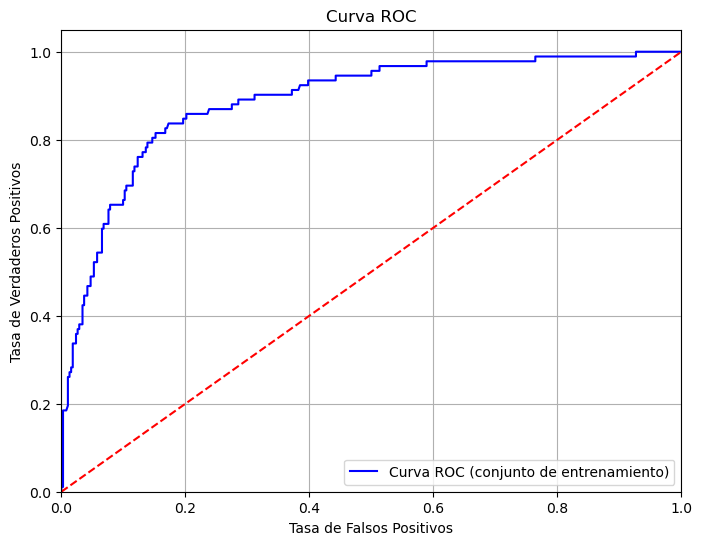

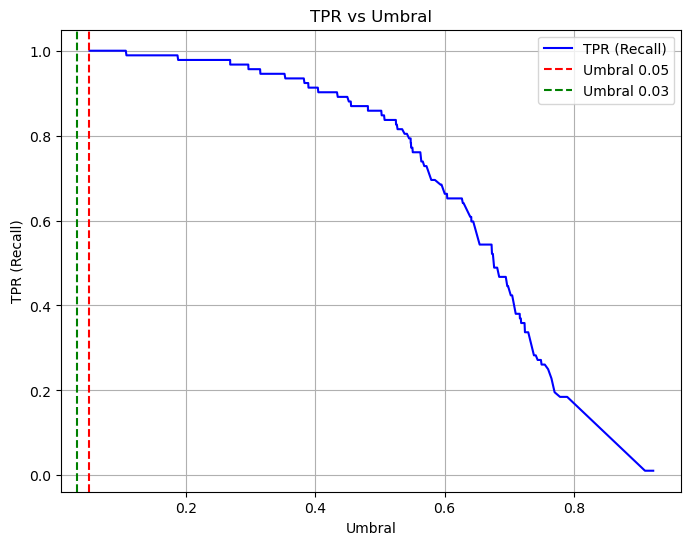

In [527]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (conjunto de entrenamiento)', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



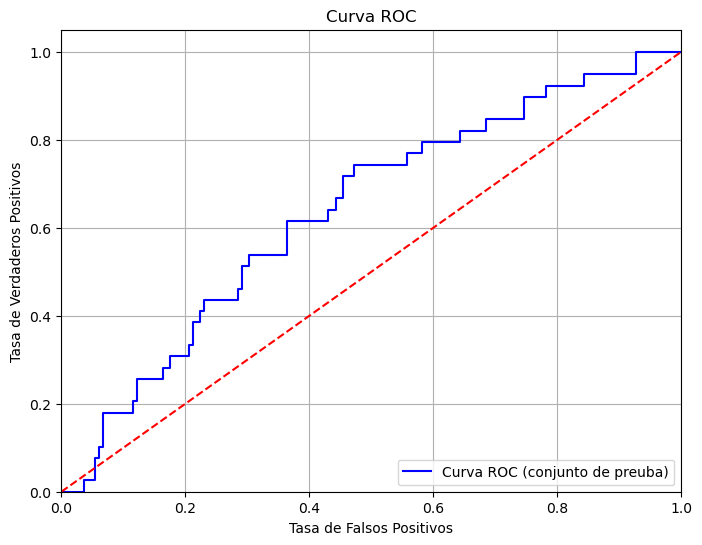

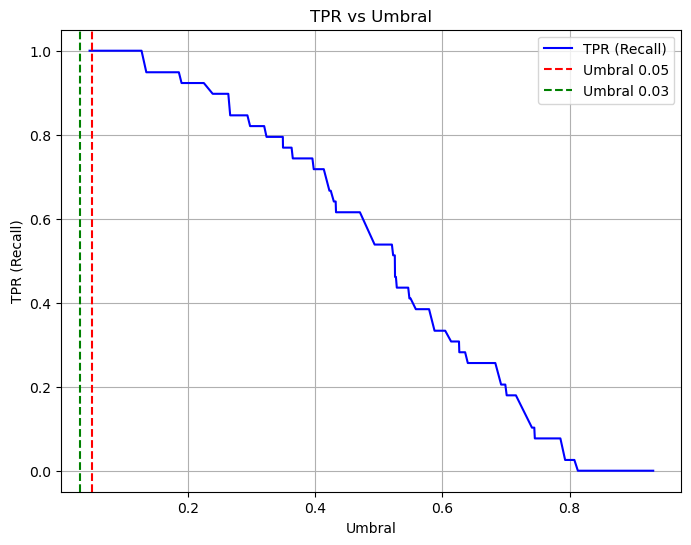

In [528]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC (conjunto de preuba)', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



Umbral óptimo ROC: 0.4706


Umbral óptimo según F1-score: 0.5584


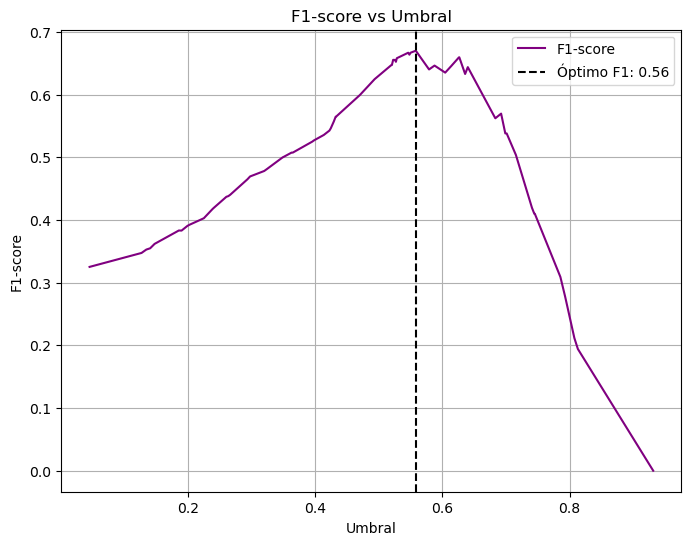

In [529]:
# Criterio: minimizar distancia al punto perfecto (0,1)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
umbral_optimo = thresholds[np.argmin(distancias)]
print(f"Umbral óptimo ROC: {umbral_optimo:.4f}")

f1_scores = [f1_score(y_train, y_proba_train > thr) for thr in thresholds]
umbral_f1 = thresholds[np.argmax(f1_scores)]
print(f"Umbral óptimo según F1-score: {umbral_f1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='purple')
plt.axvline(x=umbral_f1, color='black', linestyle='--', label=f'Óptimo F1: {umbral_f1:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral')
plt.legend()
plt.grid()
plt.show()


In [530]:
confusion_matrix(y_train, y_proba_train>0.1)

array([[ 20, 362],
       [  0,  92]])

In [531]:
confusion_matrix(y_test, y_proba>umbral_optimo)

array([[105,  60],
       [ 16,  23]])

In [532]:
selected_features = imps[-20:]
df_imps = df_modelos[selected_features]
df_imps['id_registro'] = df_modelos['id_registro']

categoricas2 = [col for col in categoricas if col in df_imps.columns]

df_tmp20 = df_tmp[selected_features].copy()
y20 = y.copy()

In [533]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat_encoded = encoder.fit_transform(df_tmp20[categoricas2])

# Crear DataFrame con los nuevos nombres de columnas
cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoder.get_feature_names_out(categoricas2),
    index=df_tmp20.index  # mantener los índices originales
)
# Concatenar con el resto de columnas no categóricas
X_encoded = pd.concat([df_tmp20.drop(columns=categoricas2), cat_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y20, test_size=0.3, stratify=y20, random_state=14)
imps

['frec_resp_1',
 'frec_resp_0',
 'frec_card_2',
 'fumador',
 'eva_2',
 'eva_1',
 'frec_resp_2',
 'esteroides',
 'enf_vasc_cer',
 'albumina_1',
 'temp_corp_2',
 'creatinina_0',
 'asa',
 'tas_1',
 'eva_0',
 'linfocitos_2',
 'tad_2',
 'plaquetas_1',
 'neutrofilos_2',
 'pcr_0',
 'linfocitos_1',
 'imc',
 'cardiopatia',
 'perdida_sang',
 'frec_card_1',
 'quick_2',
 'pcr_1',
 'temp_corp_1',
 'pcr_2',
 'localizacion']

In [534]:

#create a model with the best hyperparameters
modelo_hgb20 = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb20.fit(X_train, y_train)
y_pred_train = modelo_hgb20.predict(X_train)
y_proba_train = modelo_hgb20.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb20.predict(X_test)
y_proba = modelo_hgb20.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))


Matriz de confusión con train
[[301  81]
 [ 15  77]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       382
           1       0.49      0.84      0.62        92

    accuracy                           0.80       474
   macro avg       0.72      0.81      0.74       474
weighted avg       0.86      0.80      0.81       474

Accuracy: 0.7974683544303798
AUC: 0.8841053949465058


Matriz de confusión con test
[[106  59]
 [ 18  21]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       165
           1       0.26      0.54      0.35        39

    accuracy                           0.62       204
   macro avg       0.56      0.59      0.54       204
weighted avg       0.74      0.62      0.66       204

Accuracy: 0.6225490196078431
AUC: 0.6484848484848484


In [535]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.616
F1 score: 0.35294117647058826


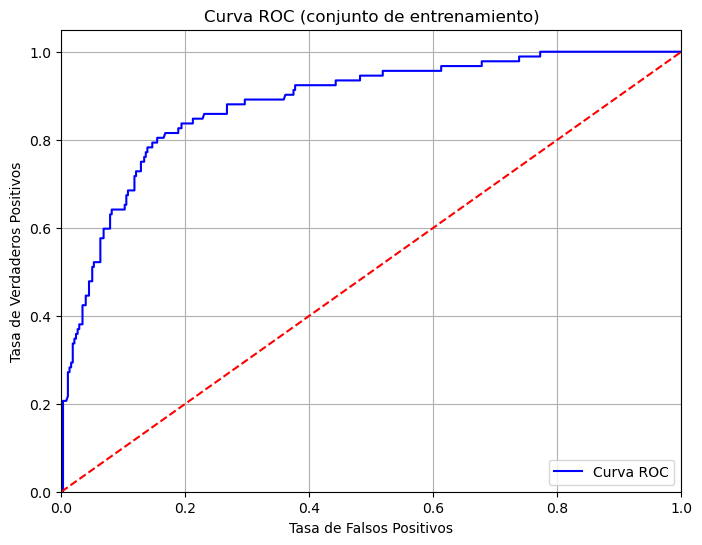

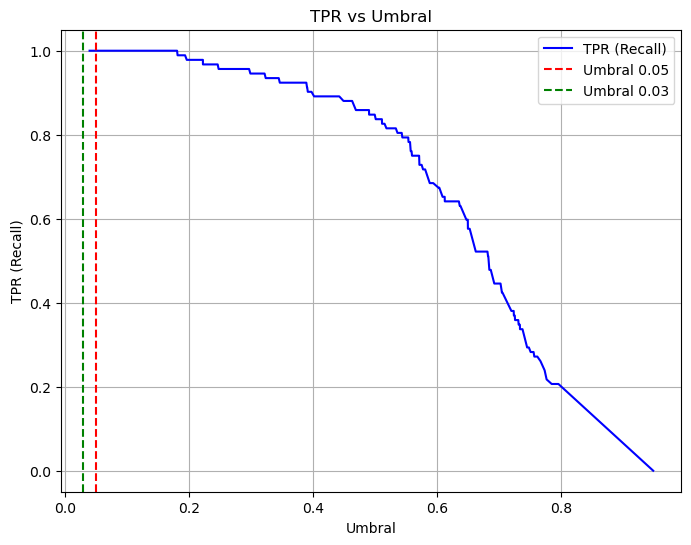

In [536]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()


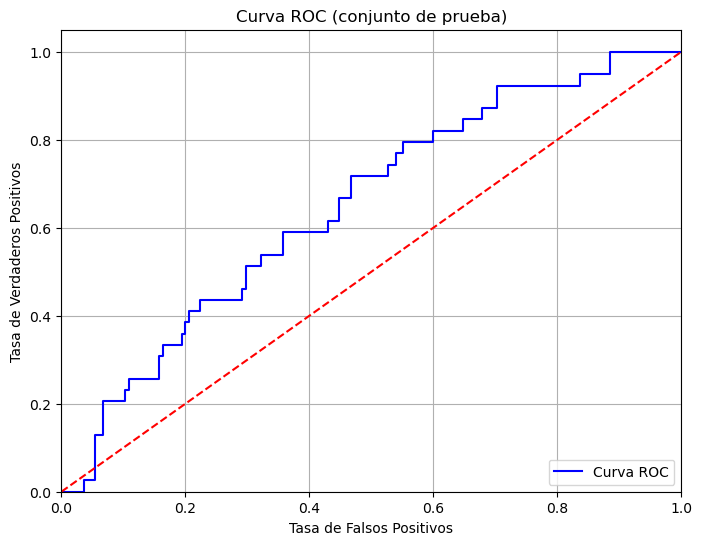

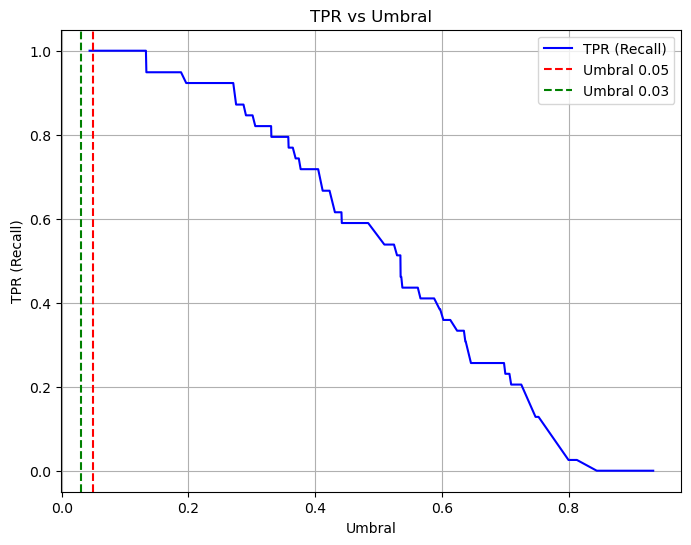

In [537]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [538]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
selected_features = imps[-10:]
df_imps = df_modelos[selected_features]
df_imps['id_registro'] = df_modelos['id_registro']

categoricas2 = [col for col in categoricas if col in df_imps.columns]

# Only use the selected features for X and y
df_tmp10 = df_tmp[selected_features].copy()
y10 = y.copy()

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustar y transformar las columnas categóricas
X_cat_encoded = encoder.fit_transform(df_tmp10[categoricas2])

# Crear DataFrame con los nuevos nombres de columnas
cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoder.get_feature_names_out(categoricas2),
    index=df_tmp10.index  # mantener los índices originales
)

# Concatenar con el resto de columnas no categóricas
X_encoded = pd.concat([df_tmp10.drop(columns=categoricas2), cat_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y10, test_size=0.3, stratify=y10, random_state=14)
imps


#create a model with the best hyperparameters
modelo_hgb10 = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb10.fit(X_train, y_train)
y_pred_train = modelo_hgb10.predict(X_train)
y_proba_train = modelo_hgb10.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb10.predict(X_test)
y_proba = modelo_hgb10.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))


Matriz de confusión con train
[[296  86]
 [ 19  73]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       382
           1       0.46      0.79      0.58        92

    accuracy                           0.78       474
   macro avg       0.70      0.78      0.72       474
weighted avg       0.85      0.78      0.80       474

Accuracy: 0.7784810126582279
AUC: 0.841907580241293


Matriz de confusión con test
[[106  59]
 [ 17  22]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.64      0.74       165
           1       0.27      0.56      0.37        39

    accuracy                           0.63       204
   macro avg       0.57      0.60      0.55       204
weighted avg       0.75      0.63      0.67       204

Accuracy: 0.6274509803921569
AUC: 0.6706293706293707


In [539]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.5816733067729084
F1 score: 0.36666666666666664


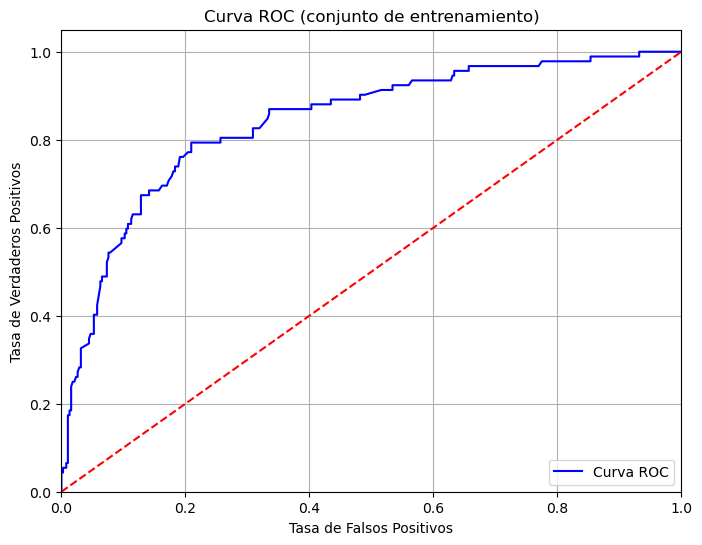

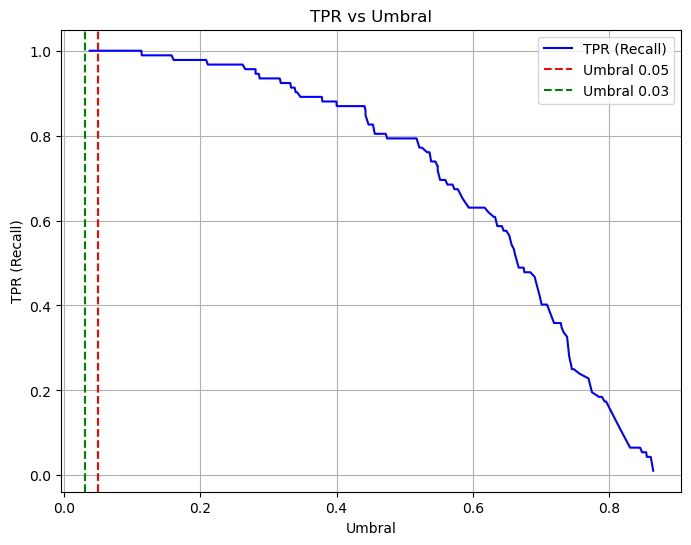

In [540]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()


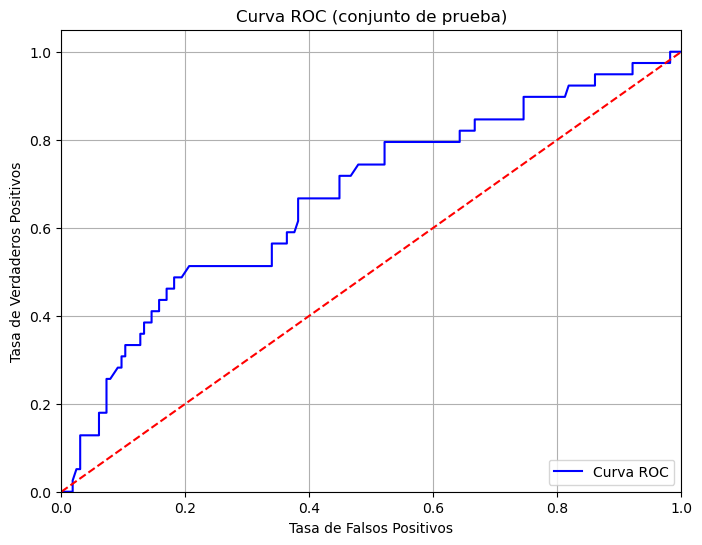

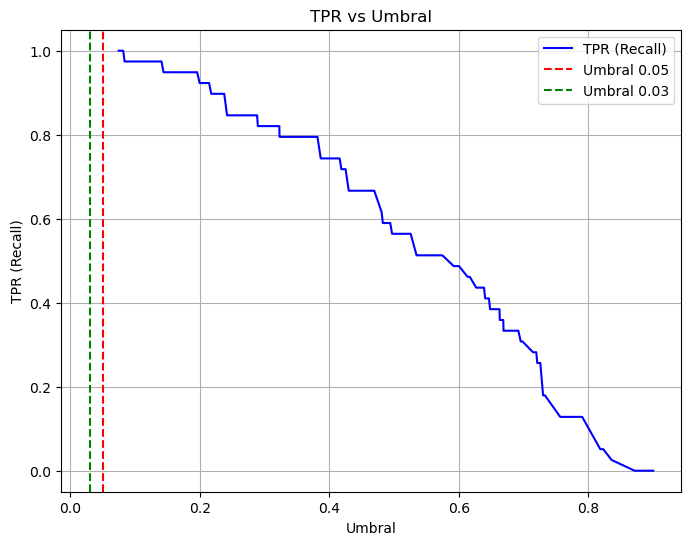

In [541]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [542]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
selected_features = imps[-30:]
df_imps = df_modelos[selected_features]
df_imps['id_registro'] = df_modelos['id_registro']

categoricas2 = [col for col in categoricas if col in df_imps.columns]

# Only use the selected features for X and y
df_tmp5 = df_tmp[selected_features].copy()
y5 = y.copy()

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustar y transformar las columnas categóricas
X_cat_encoded = encoder.fit_transform(df_tmp5[categoricas2])

# Crear DataFrame con los nuevos nombres de columnas
cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoder.get_feature_names_out(categoricas2),
    index=df_tmp5.index  # mantener los índices originales
)

# Concatenar con el resto de columnas no categóricas
X_encoded = pd.concat([df_tmp5.drop(columns=categoricas2), cat_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y5, test_size=0.3, stratify=y5, random_state=14)
imps


#create a model with the best hyperparameters
modelo_hgb5 = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb5.fit(X_train, y_train)
y_pred_train = modelo_hgb5.predict(X_train)
y_proba_train = modelo_hgb5.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb5.predict(X_test)
y_proba = modelo_hgb5.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))


Matriz de confusión con train
[[302  80]
 [ 13  79]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       382
           1       0.50      0.86      0.63        92

    accuracy                           0.80       474
   macro avg       0.73      0.82      0.75       474
weighted avg       0.87      0.80      0.82       474

Accuracy: 0.8037974683544303
AUC: 0.8885442749829273


Matriz de confusión con test
[[107  58]
 [ 18  21]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       165
           1       0.27      0.54      0.36        39

    accuracy                           0.63       204
   macro avg       0.56      0.59      0.55       204
weighted avg       0.74      0.63      0.66       204

Accuracy: 0.6274509803921569
AUC: 0.6374514374514375


In [543]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.6294820717131474
F1 score: 0.3559322033898305


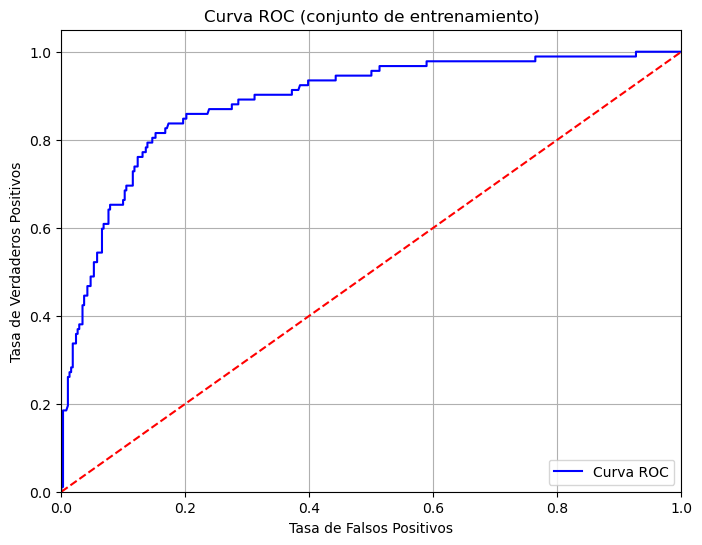

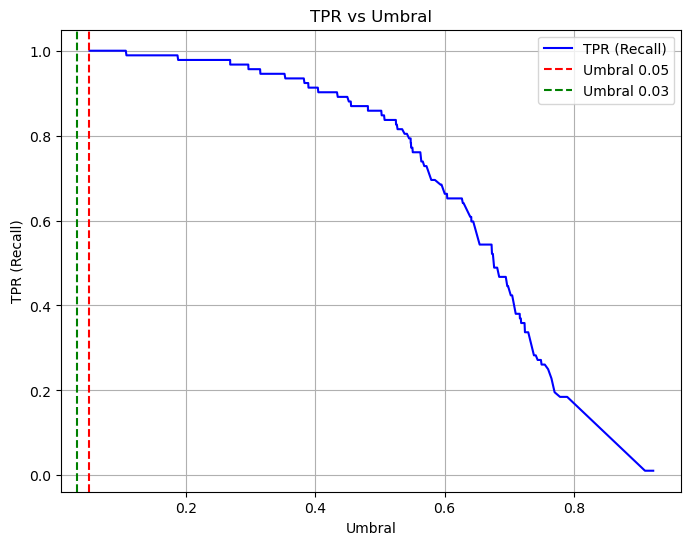

In [544]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de entrenamiento)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()


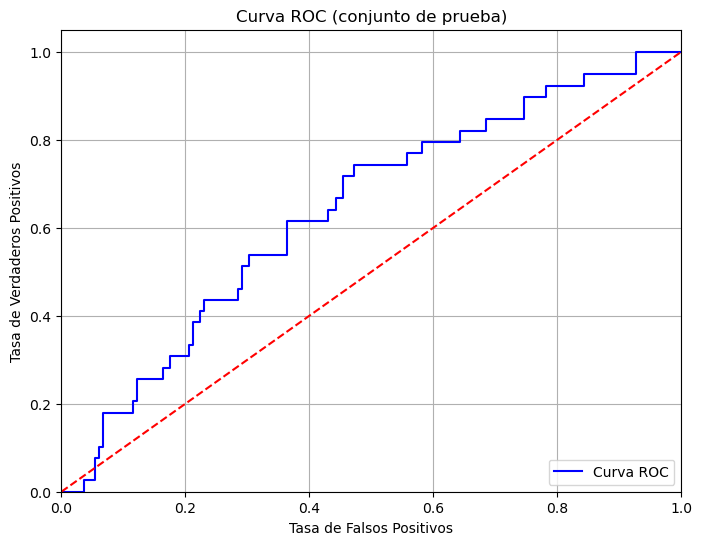

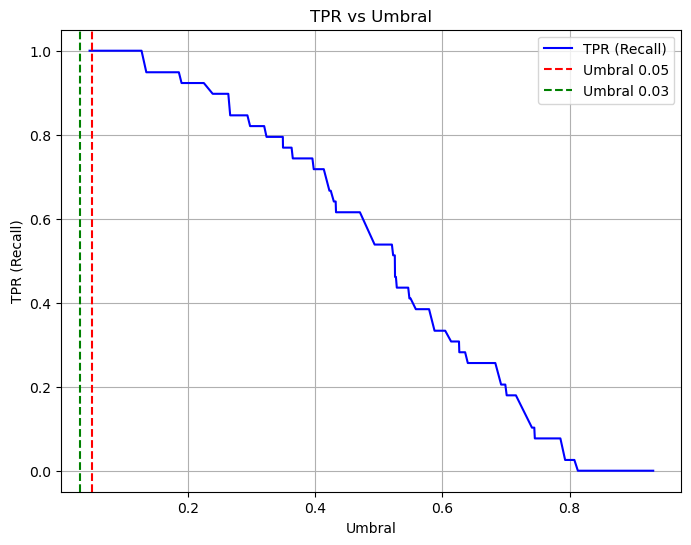

In [545]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (conjunto de prueba)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [546]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
selected_features = imps[-1:]
df_imps = df_modelos[selected_features]
df_imps['id_registro'] = df_modelos['id_registro']

categoricas2 = [col for col in categoricas if col in df_imps.columns]

# Only use the selected features for X and y
df_tmp1 = df_tmp[selected_features].copy()
y1 = y.copy()

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustar y transformar las columnas categóricas
X_cat_encoded = encoder.fit_transform(df_tmp1[categoricas2])

# Crear DataFrame con los nuevos nombres de columnas
cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoder.get_feature_names_out(categoricas2),
    index=df_tmp1.index  # mantener los índices originales
)

# Concatenar con el resto de columnas no categóricas
X_encoded = pd.concat([df_tmp1.drop(columns=categoricas2), cat_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y1, test_size=0.3, stratify=y5, random_state=14)
imps


#create a model with the best hyperparameters
modelo_hgb1 = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb1.fit(X_train, y_train)
y_pred_train = modelo_hgb1.predict(X_train)
y_proba_train = modelo_hgb1.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb1.predict(X_test)
y_proba = modelo_hgb1.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))


Matriz de confusión con train
[[144 238]
 [ 10  82]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.38      0.54       382
           1       0.26      0.89      0.40        92

    accuracy                           0.48       474
   macro avg       0.60      0.63      0.47       474
weighted avg       0.80      0.48      0.51       474

Accuracy: 0.4767932489451477
AUC: 0.6870162758934668


Matriz de confusión con test
[[ 51 114]
 [  4  35]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       165
           1       0.23      0.90      0.37        39

    accuracy                           0.42       204
   macro avg       0.58      0.60      0.42       204
weighted avg       0.79      0.42      0.45       204

Accuracy: 0.4215686274509804
AUC: 0.7125097125097124


In [547]:
#calcula el f1 score del modelo
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred_train)
print("F1 score:", f1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.39805825242718446
F1 score: 0.3723404255319149


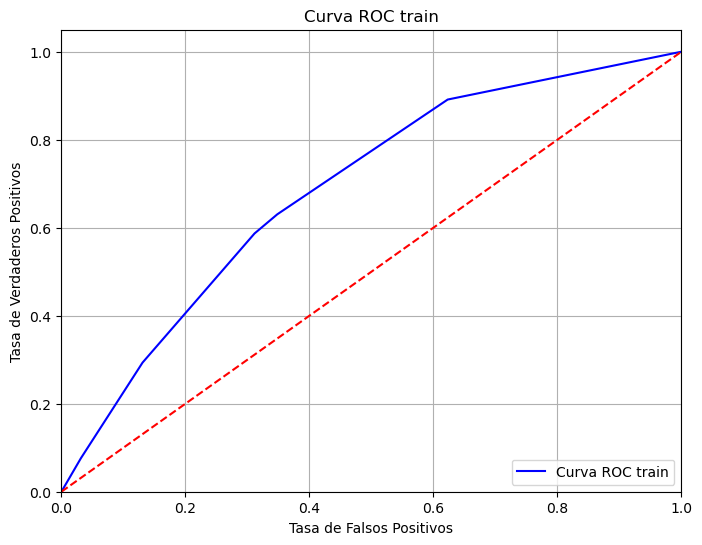

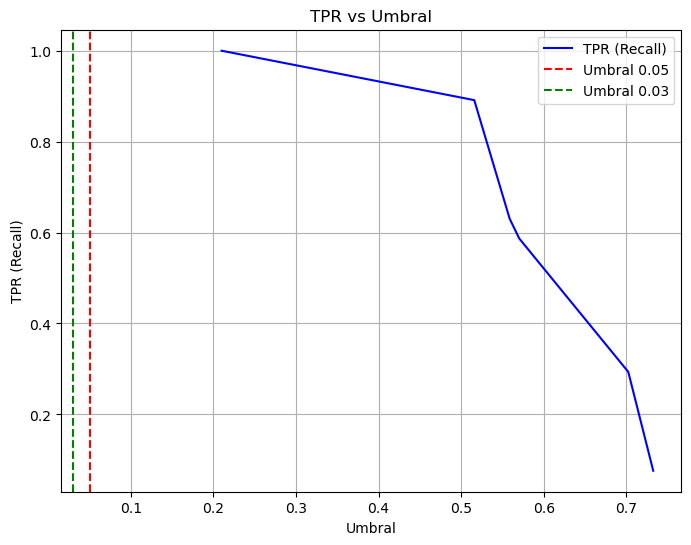

In [548]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC train')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()


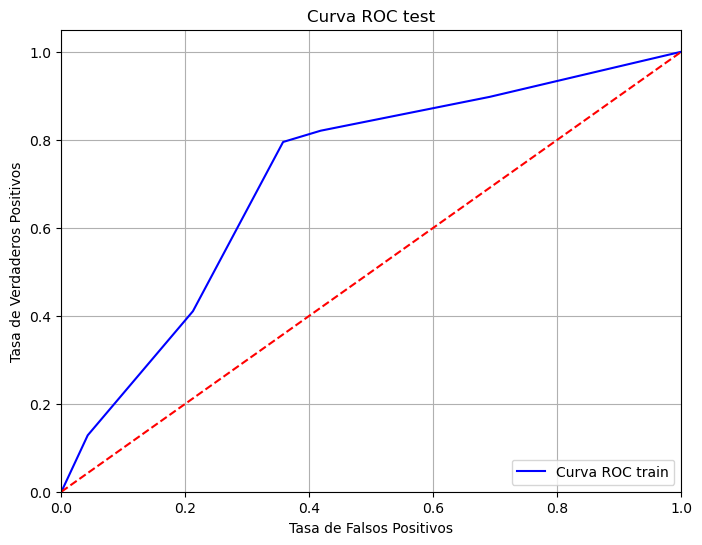

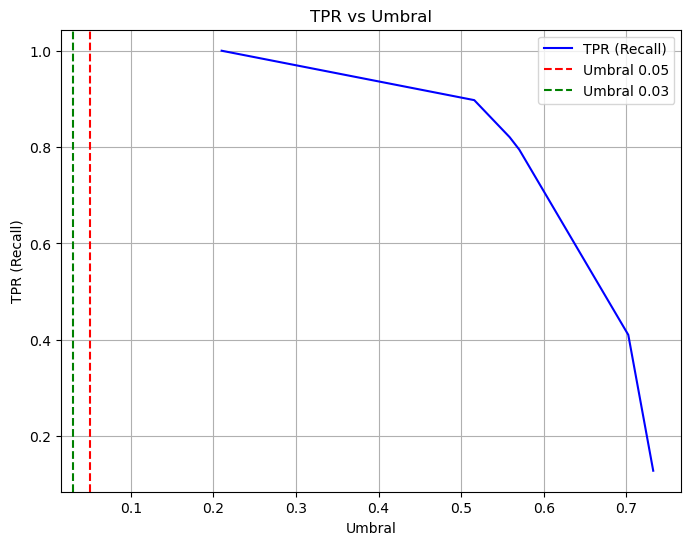

In [549]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



In [550]:
imps[-5:]

['quick_2', 'pcr_1', 'temp_corp_1', 'pcr_2', 'localizacion']

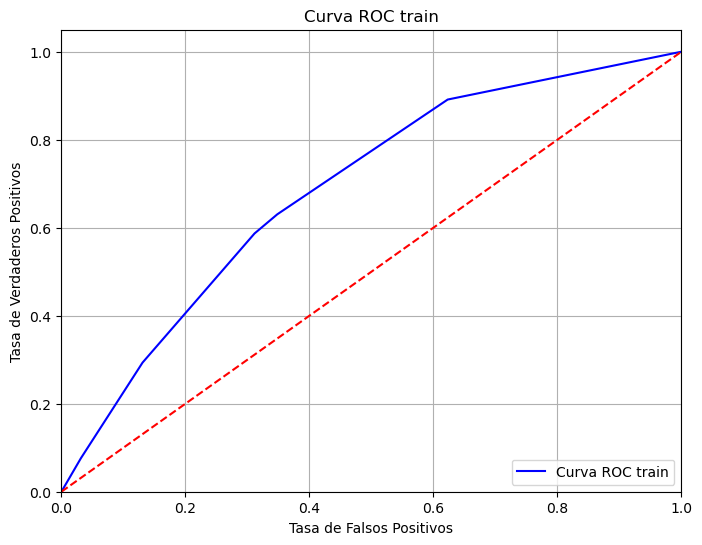

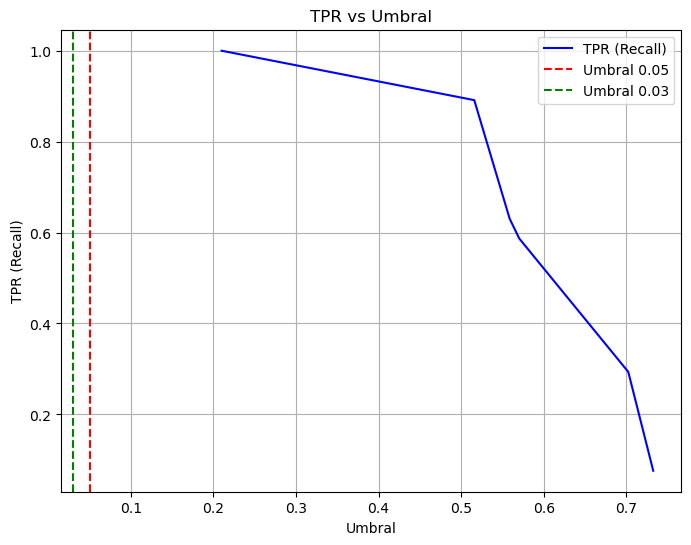

In [551]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC train')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()


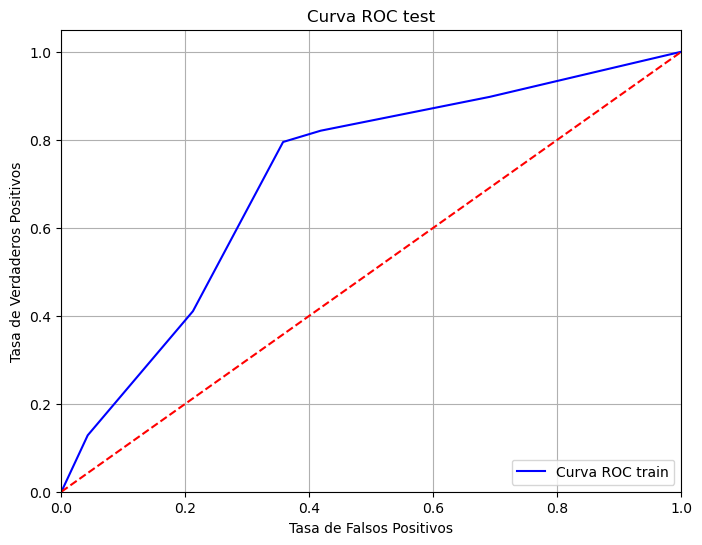

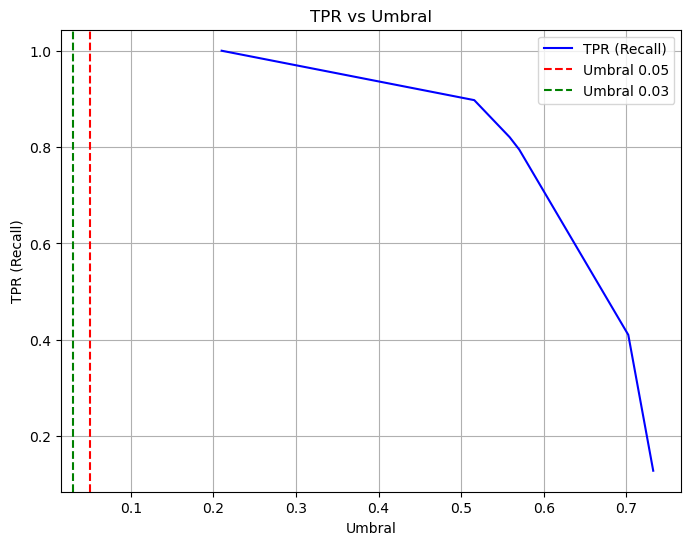

In [552]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()

